## Random Forest Classification in Scikit-Learn

In [64]:
from IPython.core.display import Image
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.patheffects as path_effects

%matplotlib inline

Summarized from [Scikit-Learn documentation](http://scikit-learn.org/stable/modules/ensemble.html#forest) on ensemble methods: 

* Ensemble methods combine predictions of several base estimators designed with a given learning algorithm in order to improve generalizability/robustness over a single estimator.


* Two families of ensemble methods are usually distinguished:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. In **averaging methods**, we build several estimators independently and average the predictions; the combined estimator is usually better than any of the single base estimator because its variance is reduced (examples include bagging methods, random forests, et al).


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. In **boosting methods**, base estimators are constructed in sequence in an attempt to reduce the bias of the combined estimator; thus, we combine several weak models to produce a powerful ensemble (examples include ADA boost, gradient boost, et al).

## Why random forests?

In [73]:
url = 'http://bit.ly/2jREzjJ'
Image(url = url, width = 850)

Characteristics:

* relies on an ensemble of decision trees

* can handle lots of features

* does regression or classification

The method:

* the random forest algorithm creates a lot of random decision trees; 

* trees are randomly generated, so most may not be helpful in your classification/regression problem;

* with each prediction, a new observation follows the path down the branches of each decision tree and is assigned a predicted value/label;

* once each of the trees in the forest report the predicted value/label for each observation, the predictions are tallied up and whichever occurs most frequently (mode) is assigned as the predicted label;

* since we ignore the predictions which don't occur as frequently, the "bad" trees end up cancelling each other out and the algorithm focuses on the trees which predict more accurately!

### Let's use Scikit-Learn to do a Random Forest classification!

Load the data into a dataframe:

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
## this step creates a new column "train" with boolean values: after assigning a \
## uniformly-distributed random number between 0 and 1 to each observation, it returns a value \
## of 1 if the random number is less than or equal to 0.75, and a value of 0 for the converse. 

df['train'] = np.random.uniform(0, 1, len(df)) <= .75

## this step makes a new column with the target name for each observation (three total)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),train,species
0,5.1,3.5,1.4,0.2,False,setosa
1,4.9,3.0,1.4,0.2,True,setosa
2,4.7,3.2,1.3,0.2,True,setosa
3,4.6,3.1,1.5,0.2,True,setosa
4,5.0,3.6,1.4,0.2,True,setosa


In [7]:
## do the train/test split according to values in the "train" column:
train, test = df[df['train']==True], df[df['train']==False]

In [8]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),train,species
1,4.9,3.0,1.4,0.2,True,setosa
2,4.7,3.2,1.3,0.2,True,setosa
3,4.6,3.1,1.5,0.2,True,setosa
4,5.0,3.6,1.4,0.2,True,setosa
5,5.4,3.9,1.7,0.4,True,setosa


In [9]:
test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),train,species
0,5.1,3.5,1.4,0.2,False,setosa
10,5.4,3.7,1.5,0.2,False,setosa
15,5.7,4.4,1.5,0.4,False,setosa
18,5.7,3.8,1.7,0.3,False,setosa
23,5.1,3.3,1.7,0.5,False,setosa


In [12]:
## do a test! this quotient should be about 0.75 according to our randomization algorithm:
float(len(train))/(len(train) + len(test))

0.78

Define the set of feature variables (X) and the target variable (y):

In [13]:
X = df.columns[:4] ## i.e., sepal length, sepal width, petal length, petal width

y, _ = pd.factorize(train['species'])

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [23]:
## see what happened with the "y, _" in the cell above?  what happens if we don't do that?
n = pd.factorize(train['species'])
n

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]),
 Index([u'setosa', u'versicolor', u'virginica'], dtype='object'))

Instantiate your random forest classifier:

In [24]:
clf = RandomForestClassifier(n_jobs=2)

Re: number of jobs, from the documentation:

_1.11.2.4. Parallelization_

Finally, this module also features the parallel construction of the trees and the parallel computation of the predictions through the n_jobs parameter. If n_jobs=k then computations are partitioned into k jobs, and run on k cores of the machine. If n_jobs=-1 then all cores available on the machine are used. Note that because of inter-process communication overhead, the speedup might not be linear (i.e., using k jobs will unfortunately not be k times as fast). Significant speedup can still be achieved though when building a large number of trees, or when building a single tree requires a fair amount of time (e.g., on large datasets).

Fit your model:

In [25]:
clf.fit(train[X], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
predictions = iris.target_names[clf.predict(test[X])]

In [32]:
pd.crosstab(test['species'], predictions, rownames=['actual'], colnames=['predictionss'])

predictionss,setosa,versicolor,virginica
actual,,,
setosa,11,0,0
versicolor,0,12,1
virginica,0,1,8


Let's plot a confusion matrix!

In [35]:
cm = confusion_matrix(test['species'], predictions)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  8]])

In [66]:
def plot_confusion_matrix(cm, title='Confusion matrix', labels=['1','2', '3'], \
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(12,8))
    plt.style.use('fivethirtyeight')

    
    plt.figure(figsize=(12,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels, rotation = 90)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                            foreground='black'), path_effects.Normal()])
    return

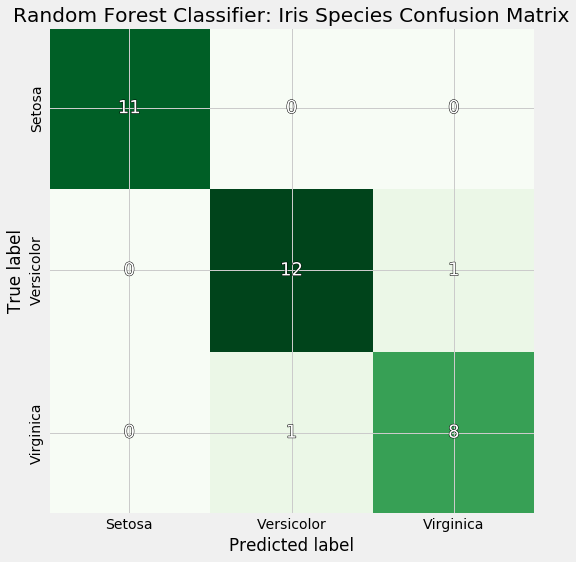

In [68]:
plot_confusion_matrix(cm, title='Random Forest Classifier: Iris Species Confusion Matrix', \
                      labels=['Setosa', 'Versicolor', 'Virginica'], cmap=plt.cm.Greens)